In [43]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
import scipy.stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
plt.rcParams["figure.figsize"] = (3,3)



print (time.ctime())

Tue Feb 23 17:21:24 2021


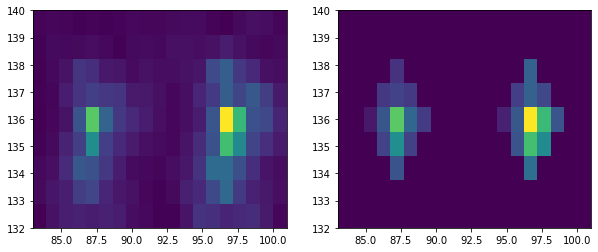

In [44]:
### Call the modules that have both the File information and the functions to perform the analysis ###
import Ion_functions as func
from Ion_functions import Ion
import choose_file 
choose_file.Jumps_Two_100s_2() #file selection, plots ROI's to verify number and location of Ions. 

### Create Ion parameters. Each Ion has data stored in its own Pandas Table. 

Ion 1 threshold: 9.99e-03(s)
Bright events (#/%): 16742 / 93.96% 

Ion 2 threshold: 9.93e-03(s)
Bright events (#/%): 25882 / 96.54% 

Ion 3 does not exist.
Ion 4 does not exist.
Ion 5 does not exist.
Ion 6 does not exist.


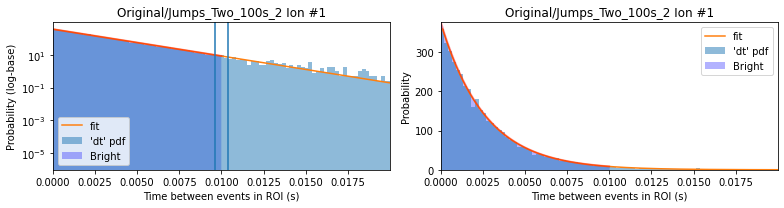

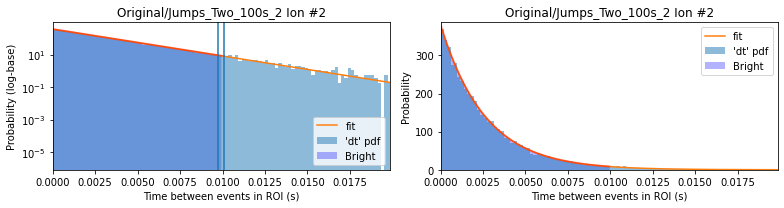

In [45]:
ion_1 = choose_file.ion_1
ion_2 = choose_file.ion_2
ion_3 = choose_file.ion_3
ion_4 = choose_file.ion_4
ion_5 = choose_file.ion_5
ion_6 = choose_file.ion_6
Ion_1 = choose_file.Ion_1
Ion_2 = choose_file.Ion_2
Ion_3 = choose_file.Ion_3
Ion_4 = choose_file.Ion_4
Ion_5 = choose_file.Ion_5
Ion_6 = choose_file.Ion_6

filename = choose_file.filename
old_data_table = choose_file.old_data_table
data_table = choose_file.data_table

sigma = 2
uncertainty = True
single_photon = False
ion_1.setup(sigma, uncertainty, single_photon)
ion_2.setup(sigma, uncertainty, single_photon)
ion_3.setup(sigma, uncertainty, single_photon)
ion_4.setup(sigma, uncertainty, single_photon)
ion_5.setup(sigma, uncertainty, single_photon)
ion_6.setup(sigma, uncertainty, single_photon)

In [46]:
x_ = [ion_1.x,
ion_2.x,
ion_3.x,
ion_4.x,
ion_5.x,
ion_6.x]
x_

[87, 97, 0, 0, 0, 0]

In [47]:
y_ = [ion_1.y,
ion_2.y,
ion_3.y,
ion_4.y,
ion_5.y,
ion_6.y]
y_

[136, 136, 0, 0, 0, 0]

In [49]:
time = data_table['time'].max() - data_table['time'].min()
print(f'{len(ion_1.transpts)} transitions  ||  {len(ion_1.data)} photons  ||  {len(ion_1.data)/len(ion_1.transpts):.2f} photons/transition  ||  {len(ion_1.transpts)/time:.2f} transitions/second  ||  {len(ion_1.data)/time:.2f} photons/second')
print(f'{len(ion_2.transpts)} transitions  ||  {len(ion_2.data)} photons  ||  {len(ion_2.data)/len(ion_2.transpts):.2f} photons/transition  ||  {len(ion_2.transpts)/time:.2f} transitions/second  ||  {len(ion_2.data)/time:.2f} photons/second')
#print(f'{len(ion_3.transpts)} transitions  ||  {len(ion_3.data)} photons  ||  {len(ion_3.data)/len(ion_3.transpts):.2f} photons/transition  ||  {len(ion_3.transpts)/time:.2f} transitions/second  ||  {len(ion_3.data)/time:.2f} photons/second')
#print(f'{len(ion_4.transpts)} transitions  ||  {len(ion_4.data)} photons  ||  {len(ion_4.data)/len(ion_4.transpts):.2f} photons/transition  ||  {len(ion_4.transpts)/time:.2f} transitions/second  ||  {len(ion_4.data)/time:.2f} photons/second')
#print(f'{len(ion_5.transpts)} transitions  ||  {len(ion_5.data)} photons  ||  {len(ion_3.data)/len(ion_5.transpts):.2f} photons/transition  ||  {len(ion_5.transpts)/time:.2f} transitions/second  ||  {len(ion_5.data)/time:.2f} photons/second')
#print(f'{len(ion_6.transpts)} transitions  ||  {len(ion_6.data)} photons  ||  {len(ion_4.data)/len(ion_6.transpts):.2f} photons/transition  ||  {len(ion_6.transpts)/time:.2f} transitions/second  ||  {len(ion_6.data)/time:.2f} photons/second')

1640 transitions  ||  17818 photons  ||  10.86 photons/transition  ||  13.67 transitions/second  ||  148.49 photons/second
1532 transitions  ||  26810 photons  ||  17.50 photons/transition  ||  12.77 transitions/second  ||  223.43 photons/second


Decay parameter: 0.0480 (s)
Decay parameter: 0.0679 (s)
Ion 3 does not exist.
Ion 4 does not exist.
Ion 5 does not exist.
Ion 6 does not exist.


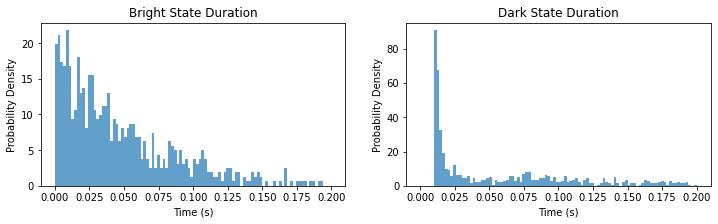

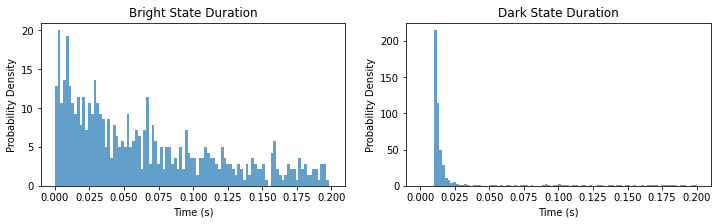

In [50]:
ion_1.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_2.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_3.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_4.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_5.duration_statistics(log = False)  ### Include log=True for a log base y-scale
ion_6.duration_statistics(log = False)  ### Include log=True for a log base y-scale

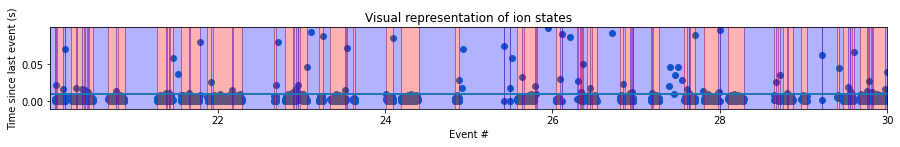

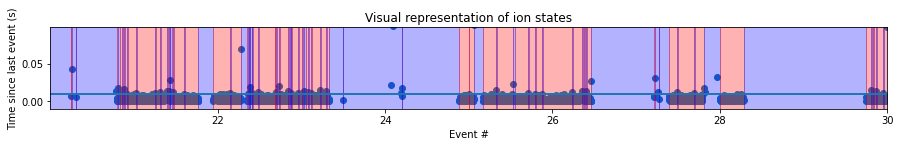

Ion 3 does not exist.
Ion 4 does not exist.
Ion 5 does not exist.
Ion 6 does not exist.


In [51]:
move = 20
start=data_table['time'].min()+move; duration=10
ion_1.visRange(start, duration)
ion_2.visRange(start, duration)
ion_3.visRange(start, duration)
ion_4.visRange(start, duration)
ion_5.visRange(start, duration)
ion_6.visRange(start, duration)

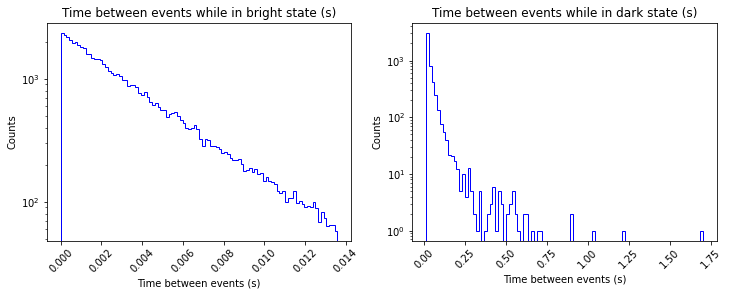

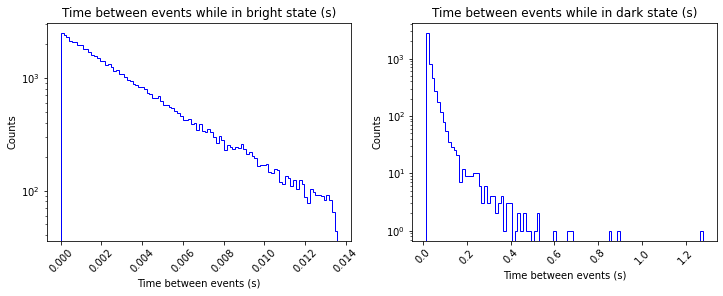

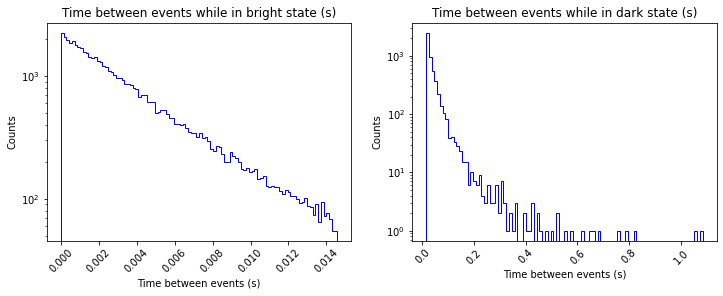

In [9]:
### ion_1.stateHistograms()
ion_2.stateHistograms()
ion_3.stateHistograms()
ion_4.stateHistograms()

Averages: [3.58199211e-03 3.52115723e-03 3.68228448e-03 3.64398669e-03
 3.75685711e-03 3.26711343e+01] 

Standard Deviation with No Alteration: 0.003195959237487303 

Average (unaltered) 0.003567778943423516 



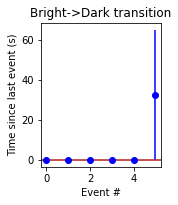

Averages: [91.49842452 24.87779179 16.93562619 31.51330056 35.13138045 51.20923833] 

Standard Deviation with No Alteration: 0.0029757740651712183 

Average (unaltered) 0.00330496652944812 



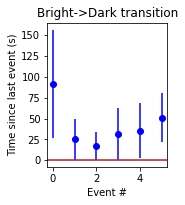

Averages: [3.47105066e-03 2.20725431e+01 3.51679302e-03 7.37854998e+01
 2.37002664e+01 3.03193949e+01] 

Standard Deviation with No Alteration: 0.002991597172587318 

Average (unaltered) 0.0033200225339003507 



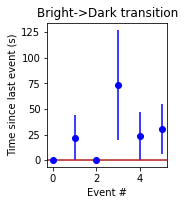

Averages: [3.38809070e-03 5.97501850e+01 1.80540468e+02 9.29133716e+01
 1.34737053e+02 2.95798296e+02] 

Standard Deviation with No Alteration: 0.0032131837579014813 

Average (unaltered) 0.0035440202159981718 



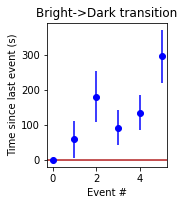

Averages: [3.98923133e+01 3.58322521e-03 1.72491447e+01 3.76756848e-03
 2.22247308e+01 4.64411003e+01] 

Standard Deviation with No Alteration: 0.003260643049020322 

Average (unaltered) 0.0036176028431952833 



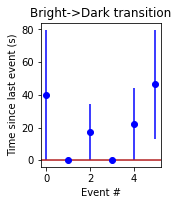

Averages: [ 44.23417894  44.52036137  44.35587189  29.8322922   56.38426669
 104.85065981] 

Standard Deviation with No Alteration: 0.003517599141313214 

Average (unaltered) 0.003912192022368152 



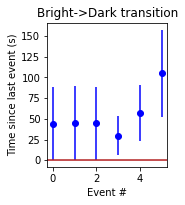

In [10]:
ion_1.leadup(6, setthresh=True)
ion_2.leadup(6, setthresh=True)
ion_3.leadup(6, setthresh=True)
ion_4.leadup(6, setthresh=True)
ion_5.leadup(6, setthresh=True)
ion_6.leadup(6, setthresh=True)
# setting the optional parameter setthresh in both dTimes() and leadup()␣
#,→ensures that counts
# above the threshold are excluded from bright state analysis in every step␣
#,→of the process

## TEST ZONE:

(array([  1., 691., 199., 101.,  47.,  41.,  18.,  17.,  14.,  20.,   9.,
         11.,   9.,   8.,   6.,   3.,   6.,   8.,   6.,   4.,   5.,   5.,
          4.,   4.,  10.,   3.,   6.,   4.,   7.,   5.,   6.,   4.,   5.,
          5.,   6.,   7.,  10.,   7.,   3.,   4.,   6.,   5.,   7.,   4.,
          2.,   5.,   2.,   3.,   3.,   0.,   1.,   3.,   2.,   5.,   2.,
          5.,   2.,   1.,   5.,   1.,   2.,   1.,   6.,   1.,   3.,   5.,
          1.,   2.,   3.,   3.,   3.,   1.,   0.,   1.,   1.,   3.,   2.,
          0.,   1.,   1.,   1.,   1.,   3.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   4.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   1.]),
 array([  0.        ,   0.99009901,   1.98019802,   2.97029703,
          3.96039604,   4.95049505,   5.94059406,   6.93069307,
          7.92079208,   8.91089109,   9.9009901 ,  10.89108911,
         11.88118812,  12.87128713,  13.86138614,  14.85148515,
         15.84158416,  16.83168317,  17.82178218,  18.81

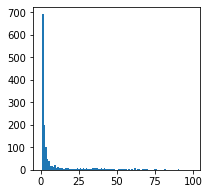

In [10]:
photon_counts = [0]
for i in range(len(ion_1.transpts)-1):
    photon_counts.append(ion_1.transpts[i+1] - ion_1.transpts[i])
plt.hist(photon_counts, bins = 101, range = (0,100))


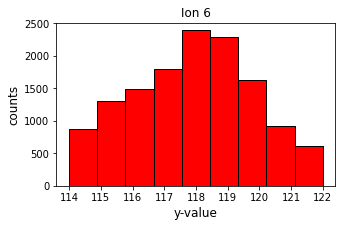

118.08007438068898 1.5696415264350996


In [10]:
ion_6.yhistogram(9)

## FLORESENCE:

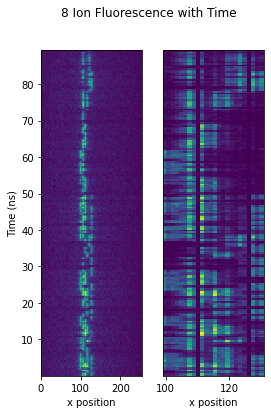

In [13]:
used_data = (data_table
             #.query("2.685e11 < time < 2.705e11")
            )
old_data = (old_data_table
             #.query("2.685e11 < time < 2.705e11")
            )
    
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(4,6))
fig.suptitle('8 Ion Fluorescence with Time')
h = ax0.hist2d(old_data['x'], old_data['time'], bins = [256, 200])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')
#ax0.set_ylim(0, 55)
#ax0.colorbar(h[3])
h = ax1.hist2d(used_data['x'], used_data['time'], bins = [24, 200])
#ax1.set_xlim(x1-5,x1+5)
ax1.set_xlabel('x position')
ax1.set_ylabel('Time (s)')
#ax1.set_ylim(0, 55)
ax1.yaxis.set_visible(False)


Text(0.5, 1.0, '350V 6 ions')

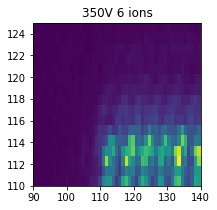

In [7]:
plt.hist2d(old_data_table['x'], old_data_table['y'], range = ([90,140], [110,125]), bins = (51, 16))
plt.title('350V 6 ions')

Text(0.5, 1.0, '350V 6 ions')

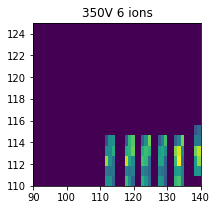

In [8]:
plt.hist2d(data_table['x'], data_table['y'], range = ([90,140], [110,125]), bins = (51, 16))
plt.title('350V 6 ions')